# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Nick Elias

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

##  Question 1

In [6]:
import requests

def save_article_html(url, filename):
    # Send the HTTP request to the URL
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'}
    response = requests.get(url, headers=headers)

    # Check if request was successful
    if response.status_code == 200:
        # Get the HTML content of the page
        html_content = response.text

        # Save the HTML content to a file
        with open(filename, 'w', encoding='utf-8') as f:
            f.write(html_content)
        
        print(f"HTML content saved to {filename}")
    else:
        print("Failed to retrieve the page.")

# Example: Save HTML content of a coffee maker review article
url = 'https://www.nytimes.com/wirecutter/reviews/best-espresso-machine-grinder-and-accessories-for-beginners/'  # Replace with the actual review article URL
save_article_html(url, 'coffee_maker_review.html')


HTML content saved to coffee_maker_review.html


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

# Question 2

In [14]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from bs4 import BeautifulSoup

# Load the spaCy model and add SpacyTextBlob extension
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

def analyze_sentiment_and_sentences(html_file):
    # Read the HTML file and extract text
    with open(html_file, 'r', encoding='utf-8') as file:
        html_content = file.read()
    
    # Parse HTML and get the text
    soup = BeautifulSoup(html_content, 'html.parser')
    article_text = soup.get_text(separator="\n", strip=True)

    # Process the text with spaCy
    doc = nlp(article_text)

    # Get the polarity score (sentiment analysis) from SpacyTextBlob
    polarity = doc._.blob.polarity  # SpacyTextBlob stores polarity in the ._.polarity attribute

    # Count the number of sentences in the article
    num_sentences = len(list(doc.sents))

    # Print the results
    print(f"Sentiment Polarity: {polarity:.2f} (Positive if >0, Negative if <0, Neutral if =0)")
    print(f"Number of Sentences in the article: {num_sentences}")

# Example: Analyze sentiment and sentences for the saved article HTML
html_file = 'coffee_maker_review.html'  # Replace with your saved HTML file path
analyze_sentiment_and_sentences(html_file)


Sentiment Polarity: 0.20 (Positive if >0, Negative if <0, Neutral if =0)
Number of Sentences in the article: 402


# Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [15]:
from collections import Counter

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

def analyze_frequent_tokens(html_file):
    # Read the HTML file and extract text
    with open(html_file, 'r', encoding='utf-8') as file:
        html_content = file.read()
    
    # Parse HTML and get the text
    soup = BeautifulSoup(html_content, 'html.parser')
    article_text = soup.get_text(separator="\n", strip=True)

    # Process the text with spaCy
    doc = nlp(article_text)

    # Create a list of tokens (converted to lowercase) and filter out stop words and punctuation
    tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]

    # Use Counter to count the frequency of each token
    token_frequencies = Counter(tokens)

    # Get the 5 most common tokens
    most_common_tokens = token_frequencies.most_common(5)

    # Print the results
    print("Top 5 Most Frequent Tokens:")
    for token, freq in most_common_tokens:
        print(f"{token}: {freq}")

    print("\nToken Frequencies:")
    for token, freq in token_frequencies.items():
        print(f"{token}: {freq}")

# Example: Analyze frequent tokens for the saved article HTML
html_file = 'coffee_maker_review.html'  # Replace with your saved HTML file path
analyze_frequent_tokens(html_file)


Top 5 Most Frequent Tokens:

: 1755
espresso: 108
machine: 94
gifts: 61
coffee: 60

Token Frequencies:
4: 4
best: 20
home: 34
espresso: 108
machines: 50
2024: 6
|: 1
reviews: 2
wirecutter: 36

: 1755
advertisement: 18
skip: 10
content: 1
help: 9
decide: 1
research: 3
log: 1
account: 1
gifts: 61
holiday: 5
occasions: 2
christmas: 5
hanukkah: 1
secret: 1
santa: 1
white: 5
elephant: 1
last‑minute: 1
stocking: 2
stuffer: 1
ideas: 2
kids: 27
stuffers: 1
adults: 4
just‑in‑case: 1
guests: 1
host: 1
hostess: 1
hobbyists: 3
gamers: 1
travelers: 1
cyclists: 1
runners: 1
golfers: 1
plant: 1
lovers: 5
book: 3
coffee: 60
photographers: 1
gardeners: 2
unique: 1
personalized: 1
work: 3
forever: 1
listening: 1
music: 3
tech: 5
gadget: 1
alcohol: 1
cocktail: 2
people: 6
cold: 5
love: 7
clean: 4
grown: 1
ups: 1
housewarming: 1
anniversary: 1
retirement: 1
birthday: 1
coworkers: 1
new: 12
moms: 2
bridal: 1
shower: 6
flower: 1
delivery: 1
gift: 1
baskets: 8
loved: 1
ones: 4
boyfriends: 1
girlfriends: 1
da

# Question 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [16]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

def analyze_frequent_lemmas(html_file):
    # Read the HTML file and extract text
    with open(html_file, 'r', encoding='utf-8') as file:
        html_content = file.read()
    
    # Parse HTML and get the text
    soup = BeautifulSoup(html_content, 'html.parser')
    article_text = soup.get_text(separator="\n", strip=True)

    # Process the text with spaCy
    doc = nlp(article_text)

    # Create a list of lemmatized tokens (converted to lowercase) and filter out stop words and punctuation
    lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]

    # Use Counter to count the frequency of each lemma
    lemma_frequencies = Counter(lemmas)

    # Get the 5 most common lemmas
    most_common_lemmas = lemma_frequencies.most_common(5)

    # Print the results
    print("Top 5 Most Frequent Lemmas:")
    for lemma, freq in most_common_lemmas:
        print(f"{lemma}: {freq}")

    print("\nLemma Frequencies:")
    for lemma, freq in lemma_frequencies.items():
        print(f"{lemma}: {freq}")

# Example: Analyze frequent lemmas for the saved article HTML
html_file = 'coffee_maker_review.html'  # Replace with your saved HTML file path
analyze_frequent_lemmas(html_file)

Top 5 Most Frequent Lemmas:

: 1755
machine: 142
espresso: 109
shot: 98
coffee: 61

Lemma Frequencies:
4: 4
best: 7
home: 34
espresso: 109
machines: 2
2024: 6
|: 1
reviews: 1
wirecutter: 36

: 1755
advertisement: 18
skip: 10
content: 1
help: 12
decide: 1
research: 3
log: 1
account: 1
gifts: 3
holiday: 5
gift: 59
occasions: 2
christmas: 5
hanukkah: 1
secret: 1
santa: 1
white: 5
elephant: 1
last‑minute: 1
stocking: 2
stuffer: 2
idea: 2
kid: 20
adult: 6
just‑in‑case: 1
guest: 1
host: 1
hostess: 1
hobbyists: 1
gamer: 1
traveler: 1
cyclist: 1
runner: 7
golfer: 1
plant: 1
lover: 5
book: 3
coffee: 61
photographer: 1
gardener: 2
unique: 1
personalized: 1
work: 7
forever: 1
listen: 1
music: 3
tech: 5
gadget: 1
alcohol: 1
cocktail: 2
people: 6
cold: 5
love: 7
clean: 5
grown: 1
ups: 1
housewarming: 1
anniversary: 1
retirement: 1
birthday: 1
coworker: 1
new: 12
mom: 2
bridal: 1
shower: 6
flower: 1
delivery: 1
basket: 18
loved: 1
ones: 1
boyfriend: 1
girlfriend: 1
dad: 1
grandparent: 1
budget: 11
$

# Question 5

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

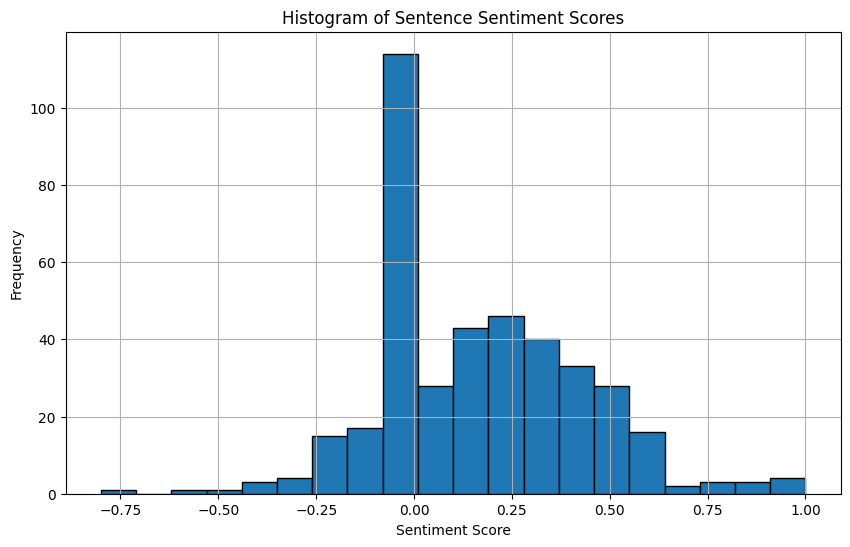

In [25]:
import matplotlib.pyplot as plt

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Add SpacyTextBlob to the pipeline
nlp.add_pipe('spacytextblob')

def analyze_sentiment_per_sentence(html_file):
    # Read the HTML file and extract text
    with open(html_file, 'r', encoding='utf-8') as file:
        html_content = file.read()
    
    # Parse HTML and get the text
    soup = BeautifulSoup(html_content, 'html.parser')
    article_text = soup.get_text(separator="\n", strip=True)

    # Process the text with spaCy
    doc = nlp(article_text)

    # List to store sentiment scores of sentences
    sentence_scores_tokens = []

    # Loop over sentences
    for sent in doc.sents:
        # Get the sentiment polarity score for the sentence
        polarity = sent._.blob.sentiment.polarity
        
        # Add the score to the list of sentence scores
        sentence_scores_tokens.append(polarity)

    # Plot histogram of sentiment scores
    plt.figure(figsize=(10, 6))
    plt.hist(sentence_scores_tokens, bins=20, edgecolor='black')
    plt.title("Histogram of Sentence Sentiment Scores")
    plt.xlabel("Sentiment Score")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    # Return the sentence scores
    return sentence_scores_tokens

# Example: Analyze sentiment scores for the saved article HTML
html_file = 'coffee_maker_review.html'  # Replace with your saved HTML file path
sentence_scores_tokens = analyze_sentiment_per_sentence(html_file)

# Check the most common range of sentiment scores (based on the histogram)
# Most common range of sentiment scores seems to be between -0.2 and 0.2


# Question 6

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

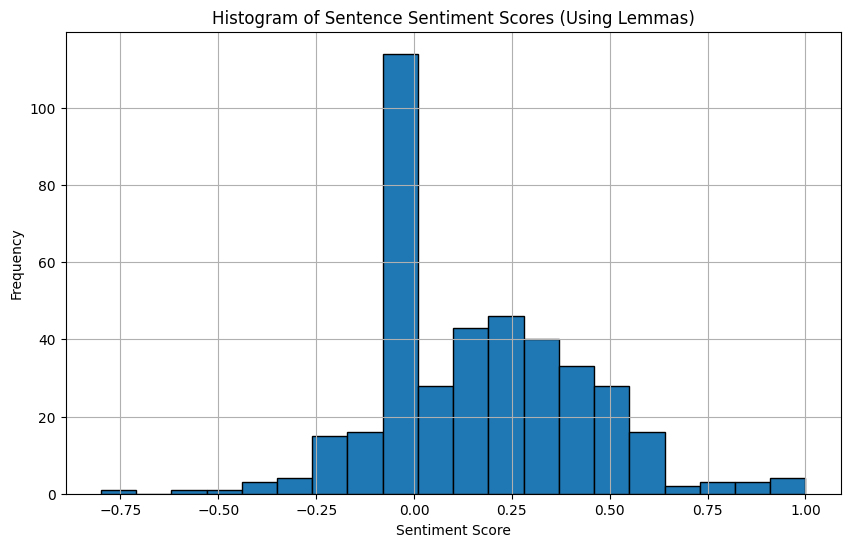

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Add SpacyTextBlob to the pipeline
nlp.add_pipe('spacytextblob')

def analyze_sentiment_using_lemmas(html_file):
    # Read the HTML file and extract text
    with open(html_file, 'r', encoding='utf-8') as file:
        html_content = file.read()
    
    # Parse HTML and get the text
    soup = BeautifulSoup(html_content, 'html.parser')
    article_text = soup.get_text(separator="\n", strip=True)

    # Process the text with spaCy
    doc = nlp(article_text)

    # List to store sentiment scores of sentences using lemmas
    sentence_scores_lemmas = []

    # Loop over sentences
    for sent in doc.sents:
        # Extract lemmas of the sentence
        lemmas = [token.lemma_ for token in sent if not token.is_stop and not token.is_punct]
        
        # Calculate the sentiment score based on the polarity of each lemma
        if lemmas:
            # Join lemmas into a sentence string
            sentence_text = ' '.join(lemmas)
            # Using the sentiment from SpacyTextBlob
            sentiment = sent._.blob.sentiment.polarity
            sentence_scores_lemmas.append(sentiment)

    # Plot histogram of sentiment scores based on lemmas
    plt.figure(figsize=(10, 6))
    plt.hist(sentence_scores_lemmas, bins=20, edgecolor='black')
    plt.title("Histogram of Sentence Sentiment Scores (Using Lemmas)")
    plt.xlabel("Sentiment Score")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    # Return the sentence scores
    return sentence_scores_lemmas

# Example: Analyze sentiment scores for the saved article HTML
html_file = 'coffee_maker_review.html'  # Replace with your saved HTML file path
sentence_scores_lemmas = analyze_sentiment_using_lemmas(html_file)

# Check the most common range of sentiment scores (based on the histogram)
# Most common range of sentiment scores seems to be between -0.2 and 0.2

# Question 7

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

In [27]:
import numpy as np

def find_cutoff(scores):
    # Sort the scores in ascending order
    sorted_scores = sorted(scores)
    
    # Find the index that corresponds to the point where fewer than half the sentences have a higher score
    cutoff_index = len(sorted_scores) // 2  # Median index (just below the middle)
    
    # The cutoff score will be the score at that index
    cutoff_score = sorted_scores[cutoff_index]
    
    return cutoff_score

# Example: Calculate cutoff for sentiment scores of tokens and lemmas
cutoff_tokens = find_cutoff(sentence_scores_tokens)  # Replace sentence_scores_tokens with the actual scores from tokens
cutoff_lemmas = find_cutoff(sentence_scores_lemmas)  # Replace sentence_scores_lemmas with the actual scores from lemmas

print(f"Cutoff Score (tokens): {cutoff_tokens}")
print(f"Cutoff Score (lemmas): {cutoff_lemmas}")


Cutoff Score (tokens): 0.1281995121280836
Cutoff Score (lemmas): 0.1281995121280836


# Question 8

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [30]:
def create_summary_based_on_tokens(html_file, cutoff_score_tokens):
    # Read and parse the HTML as before
    with open(html_file, 'r', encoding='utf-8') as file:
        html_content = file.read()
    
    # Parse HTML and extract the text
    soup = BeautifulSoup(html_content, 'html.parser')
    article_text = soup.get_text(separator="\n", strip=True)

    # Process the text with spaCy
    doc = nlp(article_text)

    # List to store sentences for the summary
    sentence_list = []

    # Loop over sentences and check their sentiment score (based on tokens)
    for sent in doc.sents:
        # Get the sentiment score of the sentence (based on tokens)
        sentiment = sent._.blob.sentiment.polarity
        
        # If the sentiment score is greater than the cutoff, add the sentence to the summary
        if sentiment > cutoff_score_tokens:
            sentence_list.append(sent.text.strip())  # Add the sentence to the list

    # Join the sentences together to create the summary
    summary = ' '.join(sentence_list)
    
    # Print the summary
    print("Summary:")
    print(summary)

# Example: Generate summary for the saved article HTML
html_file = 'coffee_maker_review.html'  # Replace with your saved HTML file path
create_summary_based_on_tokens(html_file, cutoff_tokens)


Summary:
The 4 Best Home Espresso Machines of 2024 | Reviews by Wirecutter
Advertisement
SKIP ADVERTISEMENT
Wirecutter
Wirecutter
Skip To Content
How can we help? Mug warmers
Smart bird feeders
Disposable cameras
Deals
Deals by retailer
Apple deals
Best Buy deals
Target deals
Walmart deals
Home & Garden
Vacuums, Cleaning, & Laundry
Vacuum Cleaners
Vacuum cleaners Shower curtains
Shower caddies
Shower mats
Bathroom
Bathroom scales
Bath towels
Bath mats
Grab bars
All Bathroom
Garden & Outdoors
Gardening & Lawn
Garden hoses
Hose nozzles
Gardening gloves
Garden pruners
Gifts for gardeners
Lawn mowers
Robot lawn mowers
Reel mowers
Sprinklers
Smart sprinkler timers
Maintenance
Leaf blowers
Snow blowers
Pressure washers
Chainsaws
String trimmers
Snow shovels
Wet/dry vacs
Patio
Patio furniture
Patio umbrellas
Patio heaters
Smokeless fire pits
Mosquito repellents for yards
Heating, Cooling, & Air Quality
Heating
Space heaters Learn more
›
Deal
Breville Barista Touch Espresso Machine
,
now
$704


# Question 9

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [32]:
def generate_summary_and_analyze_sentiment(html_file, cutoff_score_tokens):
    # Read and parse the HTML as before
    with open(html_file, 'r', encoding='utf-8') as file:
        html_content = file.read()
    
    # Parse HTML and extract the text
    soup = BeautifulSoup(html_content, 'html.parser')
    article_text = soup.get_text(separator="\n", strip=True)

    # Process the text with spaCy
    doc = nlp(article_text)

    # List to store sentences for the summary
    sentence_list = []

    # Loop over sentences and check their sentiment score (based on tokens)
    for sent in doc.sents:
        # Get the sentiment score of the sentence (based on tokens)
        sentiment = sent._.blob.sentiment.polarity
        
        # If the sentiment score is greater than the cutoff, add the sentence to the summary
        if sentiment > cutoff_score_tokens:
            sentence_list.append(sent.text.strip())  # Add the sentence to the list

    # Join the sentences together to create the summary
    summary = ' '.join(sentence_list)
    
    # Print the summary
    print("Summary:")
    print(summary)

    # Calculate the polarity score of the summary
    summary_doc = nlp(summary)  # Process the summary with spaCy
    summary_polarity = summary_doc._.sentiment.polarity  # Get polarity of the summary

    # Count the number of sentences in the summary
    num_sentences_in_summary = len(sentence_list)

    # Print the polarity and number of sentences
    print(f"\nPolarity Score of the Summary: {summary_polarity}")
    print(f"Number of Sentences in the Summary: {num_sentences_in_summary}")

# Example: Generate summary and print its polarity and number of sentences
html_file = 'coffee_maker_review.html'  # Replace with your saved HTML file path
generate_summary_and_analyze_sentiment(html_file, cutoff_tokens)


Summary:
The 4 Best Home Espresso Machines of 2024 | Reviews by Wirecutter
Advertisement
SKIP ADVERTISEMENT
Wirecutter
Wirecutter
Skip To Content
How can we help? Mug warmers
Smart bird feeders
Disposable cameras
Deals
Deals by retailer
Apple deals
Best Buy deals
Target deals
Walmart deals
Home & Garden
Vacuums, Cleaning, & Laundry
Vacuum Cleaners
Vacuum cleaners Shower curtains
Shower caddies
Shower mats
Bathroom
Bathroom scales
Bath towels
Bath mats
Grab bars
All Bathroom
Garden & Outdoors
Gardening & Lawn
Garden hoses
Hose nozzles
Gardening gloves
Garden pruners
Gifts for gardeners
Lawn mowers
Robot lawn mowers
Reel mowers
Sprinklers
Smart sprinkler timers
Maintenance
Leaf blowers
Snow blowers
Pressure washers
Chainsaws
String trimmers
Snow shovels
Wet/dry vacs
Patio
Patio furniture
Patio umbrellas
Patio heaters
Smokeless fire pits
Mosquito repellents for yards
Heating, Cooling, & Air Quality
Heating
Space heaters Learn more
›
Deal
Breville Barista Touch Espresso Machine
,
now
$704


AttributeError: [E046] Can't retrieve unregistered extension attribute 'sentiment'. Did you forget to call the `set_extension` method?

# Question 10:

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [35]:
def generate_summary_based_on_lemmas(html_file, cutoff_score_lemmas):
    # Read and parse the HTML as before
    with open(html_file, 'r', encoding='utf-8') as file:
        html_content = file.read()
    
    # Parse HTML and extract the text
    soup = BeautifulSoup(html_content, 'html.parser')
    article_text = soup.get_text(separator="\n", strip=True)

    # Process the text with spaCy
    doc = nlp(article_text)

    # List to store sentences for the summary
    sentence_list = []

    # Loop over sentences and check their sentiment score (based on lemmas)
    for sent in doc.sents:
        # Get the sentiment score of the sentence (based on lemmas)
        sentiment = sent._.blob.sentiment.polarity
        
        # If the sentiment score is greater than the cutoff, add the sentence to the summary
        if sentiment > cutoff_score_lemmas:
            sentence_list.append(sent.text.strip())  # Add the sentence to the list

    # Join the sentences together to create the summary
    summary = ' '.join(sentence_list)
    
    # Print the summary
    print("Summary:")
    print(summary)

# Example: Generate summary for the saved article HTML
html_file = 'coffee_maker_review.html'  # Replace with your saved HTML file path
generate_summary_based_on_lemmas(html_file, cutoff_lemmas)


Summary:
The 4 Best Home Espresso Machines of 2024 | Reviews by Wirecutter
Advertisement
SKIP ADVERTISEMENT
Wirecutter
Wirecutter
Skip To Content
How can we help? Mug warmers
Smart bird feeders
Disposable cameras
Deals
Deals by retailer
Apple deals
Best Buy deals
Target deals
Walmart deals
Home & Garden
Vacuums, Cleaning, & Laundry
Vacuum Cleaners
Vacuum cleaners Shower curtains
Shower caddies
Shower mats
Bathroom
Bathroom scales
Bath towels
Bath mats
Grab bars
All Bathroom
Garden & Outdoors
Gardening & Lawn
Garden hoses
Hose nozzles
Gardening gloves
Garden pruners
Gifts for gardeners
Lawn mowers
Robot lawn mowers
Reel mowers
Sprinklers
Smart sprinkler timers
Maintenance
Leaf blowers
Snow blowers
Pressure washers
Chainsaws
String trimmers
Snow shovels
Wet/dry vacs
Patio
Patio furniture
Patio umbrellas
Patio heaters
Smokeless fire pits
Mosquito repellents for yards
Heating, Cooling, & Air Quality
Heating
Space heaters Learn more
›
Deal
Breville Barista Touch Espresso Machine
,
now
$704


# Question 11:

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [36]:
def generate_summary_and_analyze_sentiment_lemmas(html_file, cutoff_score_lemmas):
    # Read and parse the HTML as before
    with open(html_file, 'r', encoding='utf-8') as file:
        html_content = file.read()
    
    # Parse HTML and extract the text
    soup = BeautifulSoup(html_content, 'html.parser')
    article_text = soup.get_text(separator="\n", strip=True)

    # Process the text with spaCy
    doc = nlp(article_text)

    # List to store sentences for the summary
    sentence_list = []

    # Loop over sentences and check their sentiment score (based on lemmas)
    for sent in doc.sents:
        # Get the sentiment score of the sentence (based on lemmas)
        sentiment = sent._.blob.sentiment.polarity
        
        # If the sentiment score is greater than the cutoff, add the sentence to the summary
        if sentiment > cutoff_score_lemmas:
            sentence_list.append(sent.text.strip())  # Add the sentence to the list

    # Join the sentences together to create the summary
    summary = ' '.join(sentence_list)
    
    # Print the summary
    print("Summary:")
    print(summary)

    # Calculate the polarity score of the summary
    summary_doc = nlp(summary)  # Process the summary with spaCy
    summary_polarity = summary_doc._.blob.sentiment.polarity  # Get polarity of the summary

    # Count the number of sentences in the summary
    num_sentences_in_summary = len(sentence_list)

    # Print the polarity and number of sentences
    print(f"\nPolarity Score of the Lemma-Based Summary: {summary_polarity}")
    print(f"Number of Sentences in the Lemma-Based Summary: {num_sentences_in_summary}")

# Example: Generate lemma-based summary and print its polarity and number of sentences
html_file = 'coffee_maker_review.html'  # Replace with your saved HTML file path
generate_summary_and_analyze_sentiment_lemmas(html_file, cutoff_lemmas)


Summary:
The 4 Best Home Espresso Machines of 2024 | Reviews by Wirecutter
Advertisement
SKIP ADVERTISEMENT
Wirecutter
Wirecutter
Skip To Content
How can we help? Mug warmers
Smart bird feeders
Disposable cameras
Deals
Deals by retailer
Apple deals
Best Buy deals
Target deals
Walmart deals
Home & Garden
Vacuums, Cleaning, & Laundry
Vacuum Cleaners
Vacuum cleaners Shower curtains
Shower caddies
Shower mats
Bathroom
Bathroom scales
Bath towels
Bath mats
Grab bars
All Bathroom
Garden & Outdoors
Gardening & Lawn
Garden hoses
Hose nozzles
Gardening gloves
Garden pruners
Gifts for gardeners
Lawn mowers
Robot lawn mowers
Reel mowers
Sprinklers
Smart sprinkler timers
Maintenance
Leaf blowers
Snow blowers
Pressure washers
Chainsaws
String trimmers
Snow shovels
Wet/dry vacs
Patio
Patio furniture
Patio umbrellas
Patio heaters
Smokeless fire pits
Mosquito repellents for yards
Heating, Cooling, & Air Quality
Heating
Space heaters Learn more
›
Deal
Breville Barista Touch Espresso Machine
,
now
$704


# Question 12

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

# Question 13

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?